## 차원축소 
- 주성분 분석(PCA) - 두개의 특성을 하나의 주성분으로 분석한다고? 맞냐? 

In [8]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [14]:
pca.components_.shape

(50, 10000)

In [55]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()    

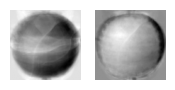

In [56]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [57]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

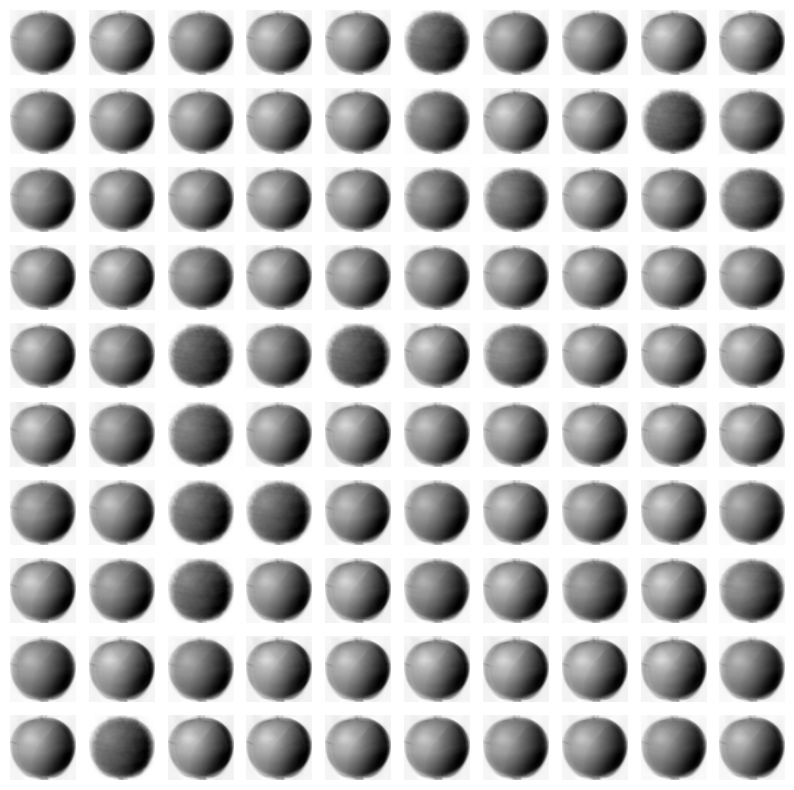

In [58]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [24]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215748794109516)

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [59]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.19596386, 0.14640307, 0.15392995, 0.15611291, 0.14456892]), 'score_time': array([0.00369906, 0.00174999, 0.00148487, 0.00155687, 0.00165701]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [62]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.01658988, 0.01013613, 0.01222301, 0.00780797, 0.08962989]), 'score_time': array([0.00076723, 0.00047612, 0.00049686, 0.00049996, 0.00062799]), 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}


/Users/choesieon/Desktop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/choesieon/Desktop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [45]:
pca =  PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [47]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [48]:
scores = cross_validate(lr,fruits_pca, target)
scores

/Users/choesieon/Desktop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/choesieon/Desktop/ml/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

{'fit_time': array([0.02100611, 0.01195908, 0.00986409, 0.00487781, 0.00874901]),
 'score_time': array([0.00070405, 0.00052667, 0.00035691, 0.00029993, 0.00029802]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [51]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

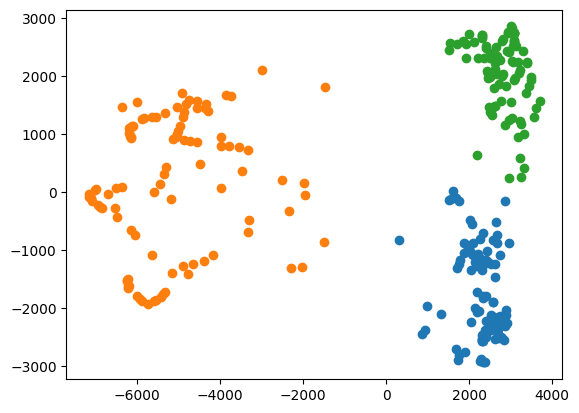

In [52]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])

In [54]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d